<a href="https://colab.research.google.com/github/jennG1425/Final-project/blob/main/Second_part/RGJ_Turbulence_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import numpy as np

In [109]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [118]:
data = np.loadtxt('./drive/MyDrive/Turbulence_Final_Project/data.csv', delimiter=',')

In [120]:
# split into input (X) and output (y) variables
x = data[:, 0:2]
y = np.array(data[:,2])

In [306]:
model = keras.Sequential()
model.add(keras.Input(shape=2))
model.add(layers.Dense(20,activation='relu',use_bias=False))
model.add(layers.Dense(20,activation='softplus',use_bias=False))
model.add(layers.Dense(1,activation='softplus',use_bias=False))
model.compile(loss='MSE',optimizer=keras.optimizers.SGD(learning_rate=0.0001))
model.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_206 (Dense)           (None, 20)                40        
                                                                 
 dense_207 (Dense)           (None, 20)                400       
                                                                 
 dense_208 (Dense)           (None, 1)                 20        
                                                                 
Total params: 460
Trainable params: 460
Non-trainable params: 0
_________________________________________________________________


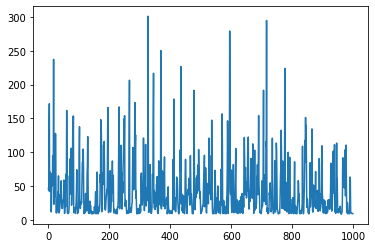

In [336]:
problem = model.fit(x,y,epochs=1000, verbose=False)
plt.plot(problem.history['loss'])
plt.show()

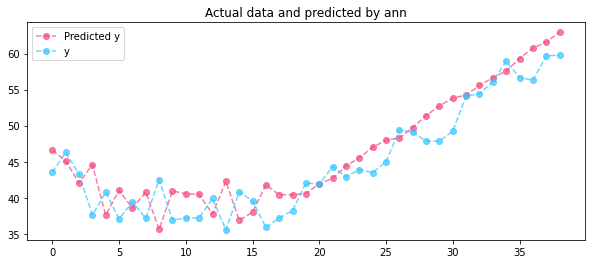

In [337]:
predict_y = model.predict(x)

fig, ax = plt.subplots(figsize=(10,4))

ax.plot(predict_y, "#F5477C", ls="--", marker="o",alpha=0.7, label='Predicted y')
ax.plot(y, "#33C4FF", ls="--", marker="o",alpha=0.7, label='y' )

plt.title('Actual data and predicted by ann')
plt.legend()
plt.show()